# FakeNewsNet - Analysis & Preprocess

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gossipcop_fake = pd.read_csv('/content/FakeNewsNet_dataset/gossipcop_fake.csv')
gossipcop_real = pd.read_csv('/content/FakeNewsNet_dataset/gossipcop_real.csv')
politifact_fake = pd.read_csv('/content/FakeNewsNet_dataset/politifact_fake.csv')
politifact_real = pd.read_csv('/content/FakeNewsNet_dataset/politifact_real.csv')

In [4]:
gossipcop_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323 entries, 0 to 5322
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         5323 non-null   object
 1   news_url   5067 non-null   object
 2   title      5323 non-null   object
 3   tweet_ids  5135 non-null   object
dtypes: object(4)
memory usage: 166.5+ KB


In [5]:
gossipcop_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16817 entries, 0 to 16816
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         16817 non-null  object
 1   news_url   16804 non-null  object
 2   title      16817 non-null  object
 3   tweet_ids  15759 non-null  object
dtypes: object(4)
memory usage: 525.7+ KB


In [6]:
politifact_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         432 non-null    object
 1   news_url   428 non-null    object
 2   title      432 non-null    object
 3   tweet_ids  392 non-null    object
dtypes: object(4)
memory usage: 13.6+ KB


In [7]:
politifact_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         624 non-null    object
 1   news_url   567 non-null    object
 2   title      624 non-null    object
 3   tweet_ids  409 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Add a label column, where 1 is real and 0 is fake:

In [8]:
gossipcop_fake['real'] = 0
gossipcop_real['real'] = 1
politifact_fake['real'] = 0
politifact_real['real'] = 1

All origin dataframes will be combined in one:

In [9]:
from sklearn.utils import shuffle

data = pd.concat([gossipcop_fake, gossipcop_real, politifact_fake, politifact_real], ignore_index=True)
data = shuffle(data).reset_index(drop=True)
data.head()

,id,news_url,title,tweet_ids,real
0,gossipcop-935582,https://variety.com/2017/film/news/henry-cavil...,Henry Cavill: ‘Justice League’ Mustache Contro...,996495234904350721\t996495528023113728\t996496...,1
1,gossipcop-9226500572,www.usmagazine.com/celebrity-news/news/taylor-...,Taylor Swift Cuts Off Selena Gomez After Justi...,443795197839675392\t443946121678041088\t444127...,0
2,gossipcop-1584523188,www.usatoday.com/story/life/people/2017/09/19/...,Ryan Phillippe on ex-girlfriend's lawsuit: 'Ev...,13208668017\t38452642296365056\t38626947894353...,0
3,gossipcop-904942,http://pennews.pencidesign.com/pennews-star-ne...,"Candace Cameron Bure, Lori Loughlin and Other ...",950550250019700737\t950560051353276416\t950638...,1
4,gossipcop-3767932547,people.com/tv/nina-dobrev-is-happy-for-ian-som...,Nina Dobrev: Ex Ian Somerhalder Marrying Nikki...,598281504402186241\t598281513432526848\t598281...,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         23196 non-null  object
 1   news_url   22866 non-null  object
 2   title      23196 non-null  object
 3   tweet_ids  21695 non-null  object
 4   real       23196 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 906.2+ KB


Extracting source domains from url:

In [11]:
!pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 7.0 MB/s eta 0:00:00


In [12]:
import tldextract

def extract_domain(url):
    try:
        parsed = tldextract.extract(url)
        parsed = ".".join([i for i in parsed if i])
        return parsed
    except:
        return 'NA'

In [18]:
data.loc[:, 'source_domain'] = data.loc[:, 'news_url'].apply(lambda x: extract_domain(x))
data.head()

,id,news_url,title,tweet_ids,real,source_domain
0,gossipcop-935582,https://variety.com/2017/film/news/henry-cavil...,Henry Cavill: ‘Justice League’ Mustache Contro...,996495234904350721\t996495528023113728\t996496...,1,variety.com
1,gossipcop-9226500572,www.usmagazine.com/celebrity-news/news/taylor-...,Taylor Swift Cuts Off Selena Gomez After Justi...,443795197839675392\t443946121678041088\t444127...,0,www.usmagazine.com
2,gossipcop-1584523188,www.usatoday.com/story/life/people/2017/09/19/...,Ryan Phillippe on ex-girlfriend's lawsuit: 'Ev...,13208668017\t38452642296365056\t38626947894353...,0,www.usatoday.com
3,gossipcop-904942,http://pennews.pencidesign.com/pennews-star-ne...,"Candace Cameron Bure, Lori Loughlin and Other ...",950550250019700737\t950560051353276416\t950638...,1,pennews.pencidesign.com
4,gossipcop-3767932547,people.com/tv/nina-dobrev-is-happy-for-ian-som...,Nina Dobrev: Ex Ian Somerhalder Marrying Nikki...,598281504402186241\t598281513432526848\t598281...,0,people.com


Replace tweet_ids on tweet_num:

In [19]:
def get_count(txt):
    if type(txt) is not str:
        return 0
    else:
        x = txt.split("\t")
        return len(x)

In [20]:
data.loc[:, 'tweet_num'] = data.loc[:, 'tweet_ids'].apply(lambda x: get_count(x))
    
data.head()

,id,news_url,title,tweet_ids,real,source_domain,tweet_num
0,gossipcop-935582,https://variety.com/2017/film/news/henry-cavil...,Henry Cavill: ‘Justice League’ Mustache Contro...,996495234904350721\t996495528023113728\t996496...,1,variety.com,60
1,gossipcop-9226500572,www.usmagazine.com/celebrity-news/news/taylor-...,Taylor Swift Cuts Off Selena Gomez After Justi...,443795197839675392\t443946121678041088\t444127...,0,www.usmagazine.com,32
2,gossipcop-1584523188,www.usatoday.com/story/life/people/2017/09/19/...,Ryan Phillippe on ex-girlfriend's lawsuit: 'Ev...,13208668017\t38452642296365056\t38626947894353...,0,www.usatoday.com,275
3,gossipcop-904942,http://pennews.pencidesign.com/pennews-star-ne...,"Candace Cameron Bure, Lori Loughlin and Other ...",950550250019700737\t950560051353276416\t950638...,1,pennews.pencidesign.com,7
4,gossipcop-3767932547,people.com/tv/nina-dobrev-is-happy-for-ian-som...,Nina Dobrev: Ex Ian Somerhalder Marrying Nikki...,598281504402186241\t598281513432526848\t598281...,0,people.com,97


Drop id and tweet_ids columns:

In [21]:
data = data.drop(columns=['id', 'tweet_ids'])
data = data[["title","news_url","source_domain","tweet_num", "real"]]
data.head()

,title,news_url,source_domain,tweet_num,real
0,Henry Cavill: ‘Justice League’ Mustache Contro...,https://variety.com/2017/film/news/henry-cavil...,variety.com,60,1
1,Taylor Swift Cuts Off Selena Gomez After Justi...,www.usmagazine.com/celebrity-news/news/taylor-...,www.usmagazine.com,32,0
2,Ryan Phillippe on ex-girlfriend's lawsuit: 'Ev...,www.usatoday.com/story/life/people/2017/09/19/...,www.usatoday.com,275,0
3,"Candace Cameron Bure, Lori Loughlin and Other ...",http://pennews.pencidesign.com/pennews-star-ne...,pennews.pencidesign.com,7,1
4,Nina Dobrev: Ex Ian Somerhalder Marrying Nikki...,people.com/tv/nina-dobrev-is-happy-for-ian-som...,people.com,97,0


# Analysis

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23196 entries, 0 to 23195
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          23196 non-null  object
 1   news_url       22866 non-null  object
 2   source_domain  23196 non-null  object
 3   tweet_num      23196 non-null  int64 
 4   real           23196 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 906.2+ KB


Top-10 sources:

<Axes: xlabel='index'>

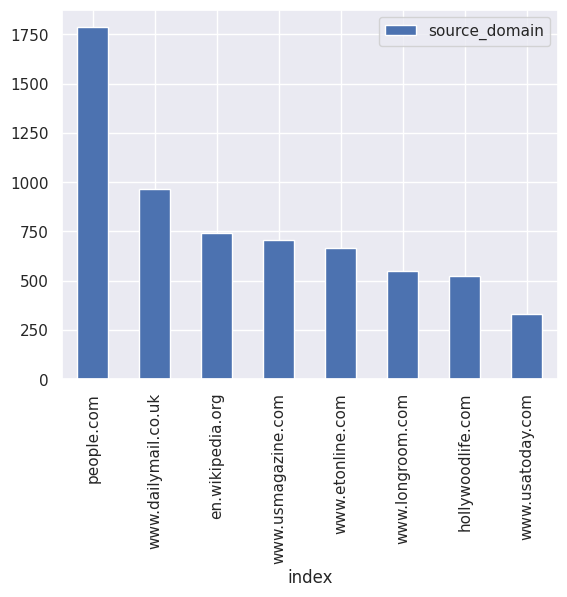

In [24]:
df_source = data['source_domain'].value_counts(ascending=False).reset_index()
df_source[:8].plot.bar(x='index')

In [25]:
data['real'].value_counts()

1    17441
0     5755
Name: real, dtype: int64

Сlasses are not balanced.

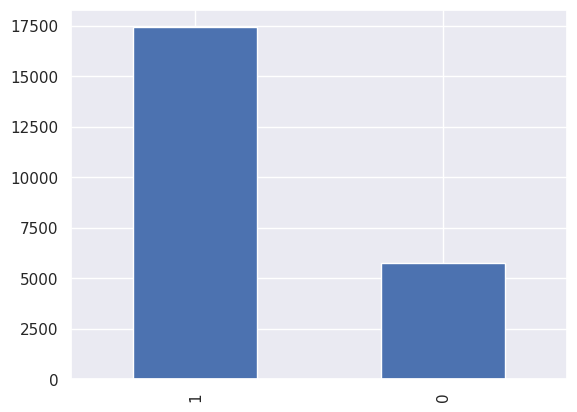

In [26]:
data['real'].value_counts().plot.bar();

Wordclouds:

In [30]:
from wordcloud import WordCloud

def make_wordcloud(text):
    wordcloud = WordCloud(width=1000, height=1000).generate(text)
    plt.figure(figsize = (10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

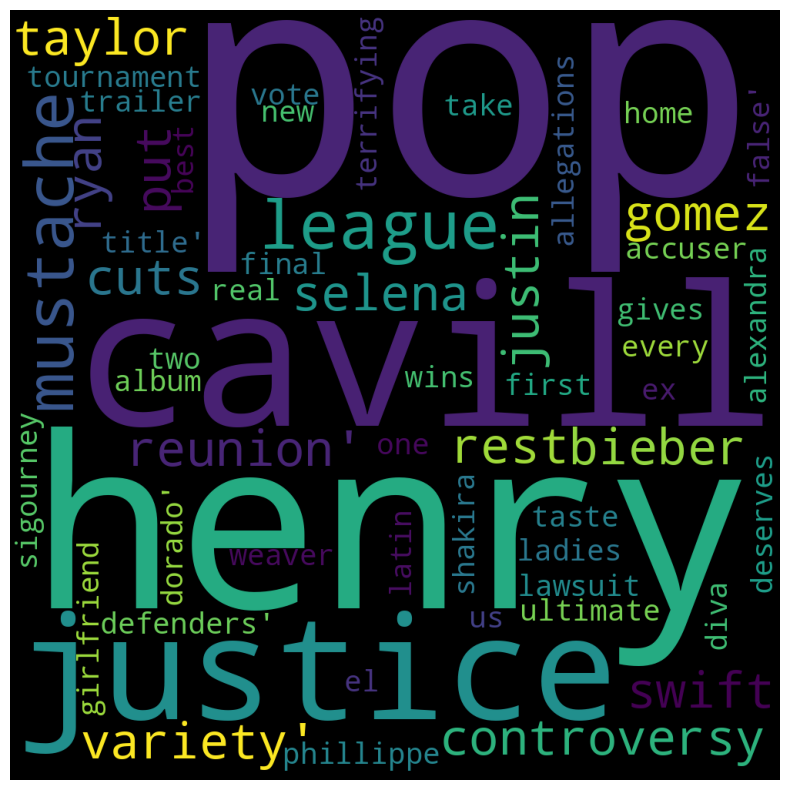

In [31]:
txt = str(data['title'].values).lower()
make_wordcloud(txt)

Saving the file:

In [ ]:
data.to_csv('FakeNewsNet.csv', index=False)